# ANLY590 Assignment 1
## Jiaqi Hu
### 1 Regularization

In [2]:
import pandas as pd
Hitters = pd.read_csv("Hitters.csv")
DF  = pd.DataFrame(Hitters)
DF = DF.dropna()

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [43]:
from sklearn.linear_model import Ridge, Lasso
X = DF.drop(['Unnamed: 0','League','Division','Salary','NewLeague'],axis=1)
Y = DF['Salary']

#### 1.1 Lasso

In [69]:
import numpy as np
import matplotlib.pyplot as plt

n_alphas = 200
alphas = np.logspace(1, 7, n_alphas)

coefs1 = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter = 5000)
    lasso.fit(X.values, Y.values)
    coefs1.append(lasso.coef_)
    
print(coefs1[100])
print(X.head())

[ 0.44808606  0.          0.          0.          0.          0.
 -0.          0.09949487  0.          0.          0.          0.
  0.          0.27503061  0.          0.        ]
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  
1   414     375      632       43      10  
2   266     263      880       82      14  
3   838     354      200       11       3  
4    46      33      805       40       4  
5   336     194      282      421      25  


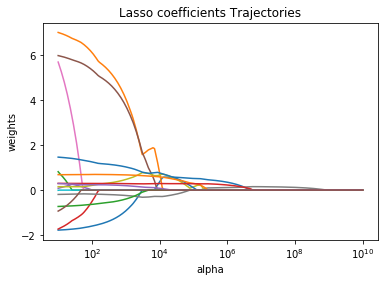

In [118]:
ax = plt.gca()
ax.plot(alphas, coefs1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients Trajectories')
plt.axis('tight')
plt.show()

The last three predictors are AtBat, CAtBat, and PutOuts.

In [101]:
from sklearn.model_selection import cross_val_score
n_alphas = 100
alphas = np.logspace(1, 3, n_alphas)
rmse_scores = []
for a in alphas:
    lasso1 = Lasso(alpha=a, fit_intercept=False, max_iter = 10000)
    scores = cross_val_score(lasso1, X, Y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores.append(np.sqrt(np.mean(-scores)))

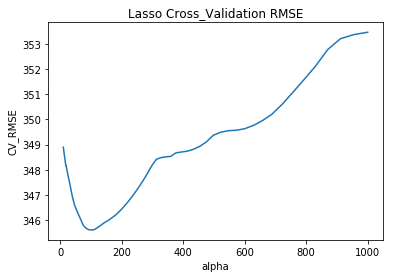

In [121]:
plt.xlabel('alpha')
plt.ylabel('CV_RMSE')
plt.title('Lasso Cross_Validation RMSE')
plt.plot(alphas, rmse_scores)
plt.show()

In [103]:
index = rmse_scores.index(min(rmse_scores))
print(alphas[index], min(rmse_scores))

102.35310218990269 345.5986691174794


In [106]:
coefs2 = []
lasso2 = Lasso(alpha = alphas[index], fit_intercept = False, max_iter = 5000)
lasso2.fit(X.values, Y.values)
coefs2 = lasso2.coef_
print(coefs2)

[-1.36960953  5.27362252  0.         -0.          0.          4.71990113
  0.         -0.19758875  0.31852574  0.          1.14326033  0.69108767
 -0.54402938  0.29500722  0.22970883 -0.        ]


The optimal value of the regularization penality is 102.35, which gives the minimum mean rmse 345.6  
There are 10 predictors left in the model.

#### 1.2 Ridge

In [116]:
n_alphas = 200
alphas = np.logspace(1, 10, n_alphas)

coefs3 = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False, max_iter = 5000)
    ridge.fit(X.values, Y.values)
    coefs3.append(ridge.coef_)

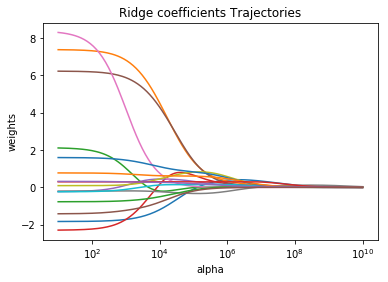

In [119]:
ax = plt.gca()
ax.plot(alphas, coefs3)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients Trajectories')
plt.axis('tight')
plt.show()

In [128]:
n_alphas = 100
alphas = np.logspace(1, 5, n_alphas)
rmse_scores1 = []
for a in alphas:
    ridge1 = Ridge(alpha=a, fit_intercept=False, max_iter = 10000)
    scores = cross_val_score(ridge1, X, Y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores1.append(np.sqrt(np.mean(-scores)))

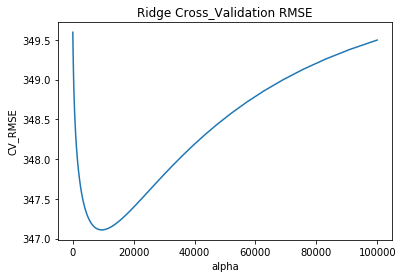

In [129]:
plt.xlabel('alpha')
plt.ylabel('CV_RMSE')
plt.title('Ridge Cross_Validation RMSE')
plt.plot(alphas, rmse_scores1)
plt.show()

In [130]:
index = rmse_scores1.index(min(rmse_scores1))
print(alphas[index], min(rmse_scores1))

9770.099572992256 347.1094777825392


The optimal panelty of ridge model is 9770.1, which gives the lowest rmse score 347.1

### 2 Short Answer
For a model, if the bias is high,the varience would be low; and if the bias is low, the varience would be high. When a model overfitting,which means that the second situation happends, it would perform well on training data, and bad on test data.
Regularization is a way to prevent overfitting, and it makes the variences lower and make the model smoother by penalizing the coefficients.
